In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv")
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [36]:
df["y_bin"] = df["y"].map({"yes": 1, "no": 0})



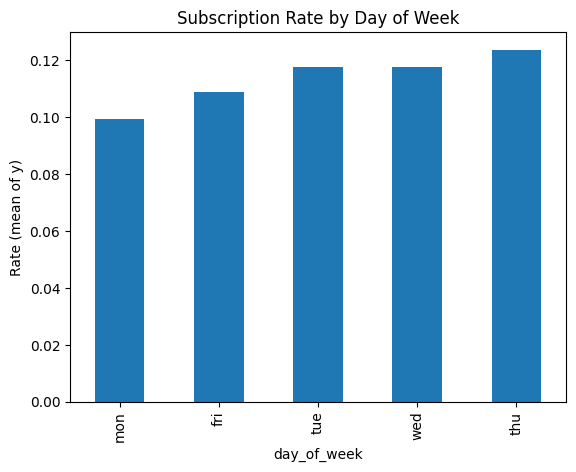

In [37]:
rate_by_day = df.groupby("day_of_week")["y_bin"].mean().sort_values()

plt.figure()
rate_by_day.plot(kind="bar")
plt.title("Subscription Rate by Day of Week")
plt.ylabel("Rate (mean of y)")
plt.show()


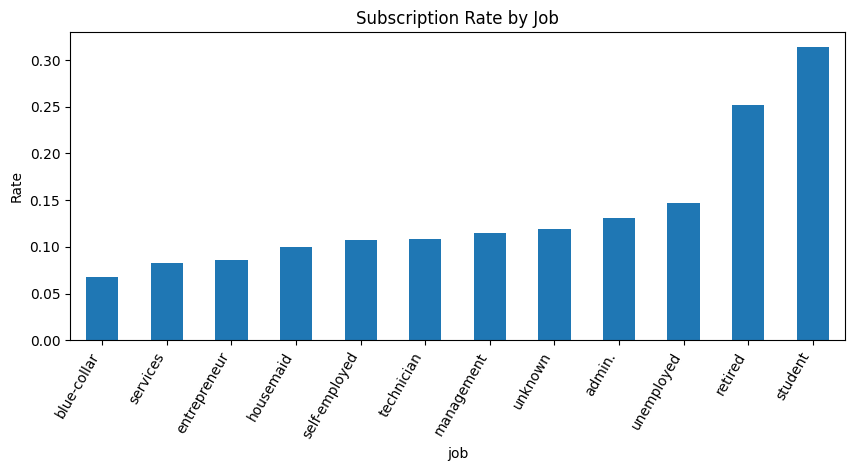

In [38]:
rate_by_job = df.groupby("job")["y_bin"].mean().sort_values()

plt.figure(figsize=(10,4))
rate_by_job.plot(kind="bar")
plt.title("Subscription Rate by Job")
plt.ylabel("Rate")
plt.xticks(rotation=60, ha="right")
plt.show()



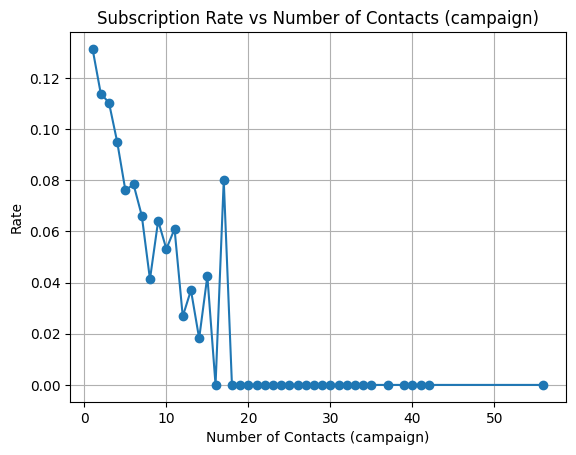

In [39]:
rate_by_campaign = df.groupby("campaign")["y_bin"].mean()

plt.figure()
rate_by_campaign.plot(kind="line", marker="o")
plt.title("Subscription Rate vs Number of Contacts (campaign)")
plt.xlabel("Number of Contacts (campaign)")
plt.ylabel("Rate")
plt.grid(True)
plt.show()


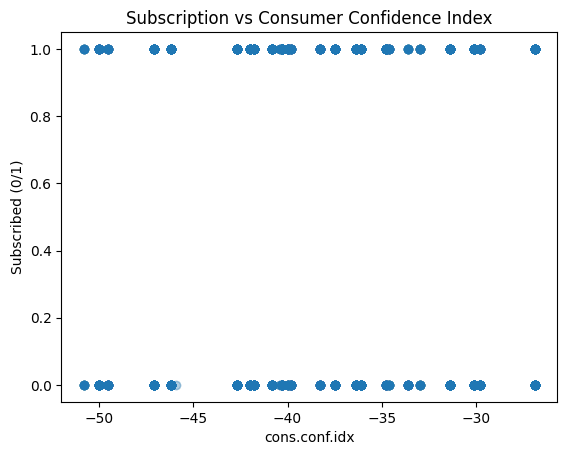

In [40]:
plt.figure()
plt.scatter(df["cons.conf.idx"], df["y_bin"], alpha=0.05)
plt.title("Subscription vs Consumer Confidence Index")
plt.xlabel("cons.conf.idx")
plt.ylabel("Subscribed (0/1)")
plt.show()


In [41]:
X = df.drop(columns=["y", "y_bin"])
y = df["y_bin"]



In [42]:
X_encoded = pd.get_dummies(X, drop_first=True)


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    min_samples_leaf=2,
    n_jobs=-1,
    class_weight="balanced"
)

rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', min_samples_leaf=2,
                       n_estimators=300, n_jobs=-1, random_state=42)

In [45]:
val_preds = rf.predict(X_val)

print(confusion_matrix(y_val, val_preds))
print(classification_report(y_val, val_preds))


[[6134  438]
 [ 418  424]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      6572
           1       0.49      0.50      0.50       842

    accuracy                           0.88      7414
   macro avg       0.71      0.72      0.72      7414
weighted avg       0.89      0.88      0.89      7414



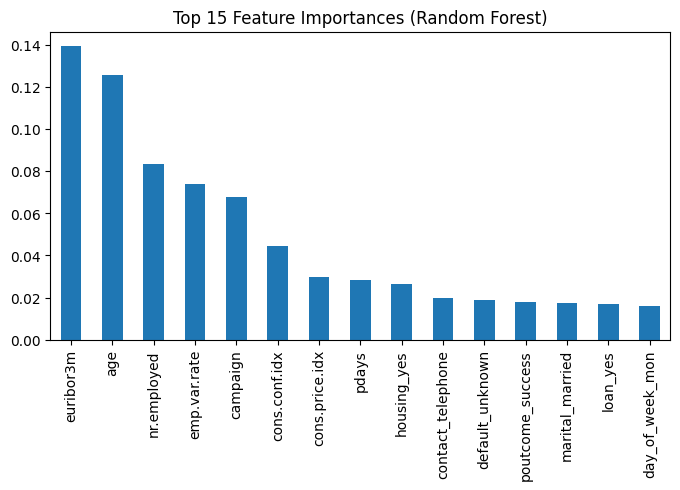

In [46]:
importances = pd.Series(
    rf.feature_importances_,
    index=X_encoded.columns
).sort_values(ascending=False)

plt.figure(figsize=(8,4))
importances.head(15).plot(kind="bar")
plt.title("Top 15 Feature Importances (Random Forest)")
plt.show()
